# Module 1 : Rocket Flight


# Introduction et implémentation de la méthode d'Euler

Nous étudions le mouvement d'une fusée lancée verticalement et qui retombe au sol. Soient $h$ son altitude en mètres et $v$ sa vitesse en mètres/secondes.

Les équations que nous allons résoudre numériquement sont données dans l'énoncé $(*)$ :

$$\frac{dh}{dt}=v$$
$$\frac{dv}{dt}=-g+\frac{\dot{m}_{p}v_e-{\frac{1}{2}\rho}v|v|AC_D}{(m_s+m_p)}$$

où : $$m_p=m_{p_0}-\int_0^t\dot{m_p}d\tau$$

est la masse de carburant présent dans la fusée. Les autres variables et constantes utilisées sont définies plus loin.

Commençons par importer deux packages qui nous seront utiles plus tard : numpy pour certaines opérations sur les tableaux, et le module pyplot de mathplotlib qui nous permettra de représenter des fonctions graphiquement.

In [2]:
import numpy 
from matplotlib import pyplot
%matplotlib inline 

Implémentons les constantes qui seront utilisées dans les calculs.

In [3]:
r = 0.5 # (m) Rayon de la section d'aire la plus grande de la fusée
m_s = 50 # (kg) Masse de la fusée sans carburant
g = 9.81 # (m/s²) Accélération de la pesanteur
rho = 1.091 # (kg/m³) Densité de l'air moyenne, supposée constante sur la trajectoire 
A = numpy.pi*(r**2) # (m²) Aire de la tranche la plus large de la fusée
v_e = 325 # (m/s) Vitesse d'éjection du carburant
C_D = 0.15 # Coefficient de trainée
m_p0 = 100 # (kg) Masse du carburant au lancement (en t=0)
h_0 = 0 
v_0 = 0 # On se place dans un référentiel tel que la fusée part d'une altitude h = 0m et à une vitesse v = 0m/s.



Soit au départ $u$ un tableau à deux colonnes, où $u_0=h$ et $u_1=v$. Nous nommons la première colonne du vecteur "0" et la seconde "1" dans python. Cela signifie donc que la première colonne de $u$ contiendra des valeurs de l'altitude de la fusée et la seconde des valeurs de sa vitesse. 

Écrivons pour simplifier $u$ de cette manière :

$$u=\begin{pmatrix}
   h  \\
   v  
\end{pmatrix}$$

Nous créons ensuite une fonction $f$ qui enverra chaque composante de $u$ sur sa dérivée temporelle
$$f:u=\begin{pmatrix}
   h  \\
   v  
\end{pmatrix} \rightarrow \begin{pmatrix}
   h'  \\
   v'  
\end{pmatrix}$$

Ou, avec $(*)$ :

$$f:u=\begin{pmatrix}
   h  \\
   v  
\end{pmatrix} \rightarrow \begin{pmatrix}
   v  \\
   -g+\frac{\dot{m}_{p}v_e-{\frac{1}{2}\rho}v|v|AC_D}{(m_s+m_p)}  
\end{pmatrix}$$

$f$ nous servira dans la méthode d'Euler.

In [4]:
def f(u):
        
    h = u[0]
    v = u[1]
    
    return numpy.array([v,(-g) + ((mdot*v_e)-(1/2)*rho*v*abs(v)*A*C_D)/(m_s + m_p)])

Ici nous allons définir la fonction "euler_step" définie comme suit :
$$euler\_step:(u,f,dt)\rightarrow u+f(u)dt= \begin{pmatrix}
   h  \\
   v  
\end{pmatrix} + \begin{pmatrix}
   v  \\
   -g+\frac{\dot{m}_{p}v_e-{\frac{1}{2}\rho}v|v|AC_D}{(m_s+m_p)}  
\end{pmatrix}dt$$

In [5]:
def euler_step(u, f, dt):
    return u + (dt * f(u))

Nous attribuons a la valeur $dt$ le pas temporel à utiliser dans l'algorithme d'Euler, donné dans l'énoncé par $dt$ = 0,1$s$. 

# Estimation de T

A présent, il nous faut estimer le nombre d'itération que nous allons réaliser avec notre fonction euler_step. Une fois que la fusée se sera écrasée, il n'y aura plus rien d'intéressant à mesurer, donc nous allons tenter d'obtenir une estimation supérieure de sa durée de vol.

On va supposer que la fusée n'est soumise à aucun frottement, ce qui donnera logiquement une durée de vol plus longue qu'en réalité :

$$ C_D = 0 $$
$$\Rightarrow \frac{dv}{dt}=-g+\frac{\dot{m}_{p}v_e}{(m_s+m_p)}$$

Et nous n'avons ainsi plus d'équation différentielle sur $v$.

Décomposons maintenant le vol en 3 étapes : l'accélération initiale avec carburant qui dure 5 secondes, le reste de l'ascension de la fusée et enfin sa chute libre.

- $t<5$

On sait que $m_p(t=0)=100$ et $m_p(t=5)=0$. De plus, en $t<5$, la variation de masse de carburant est constante :
$\dot{m}=20$. On peut donc faire l'approximation que la masse de carburant est constante sur les 5 premières secondes et équivaut à la moyenne des valeurs extrêmes :

$$ m_p(t<5)=\frac{100+0}{2}=50 $$

On obtient ainsi que (en arrondissant à $g=-10$) :

$$\frac{dv}{dt}=cst=-10 + \frac{20.325}{50+50}=55~\text{m/s²}$$

L'accélération étant maintenant constante, on peut utiliser les équations de la mécanique classique pour estimer la position et la vitesse de la fusée à l'instant $t=5$.

- $t=5$

$$h_{(t=5)}=\frac{\frac{dv}{dt}t^2}{2}+v_0t+h_0=\frac{55t²}{2}+0+0=688~\text{m}$$

$$v_{(t=5)}=\frac{dv}{dt}t+v_0=55t+0=275~\text{m/s}$$

Maintenant qu'il n'y a plus de carburant, la fusée n'est plus soumise qu'à la force de gravité qui est une force conservative. Ainsi, nous allons pouvoir utiliser la conservation de l'énergie mécanique pour approximer l'altitude maximale atteinte par l'engin :

$$E_{méc}=E_{pot}+E_{cin}=(m_s+m_p)gh_{(t=5)}+\frac{(m_s+m_p)v^2_{(t=5)}}2$$

$$=344~000+1~890~625=2~234~625~\text{J}$$

- $t=t_{(h_{max})}=5+t_2$

Au plus haut de sa trajectoire, en $h_{max}$, la fusée n'a plus d'énergie cinétique mais a toujours la même énergie mécanique totale :

$$E_{cin}=0\Rightarrow E_{pot}=m_sgh_{max}=2~234~625~\text{J}$$

$$\Rightarrow h_{max}=4~469~\text{m}$$

Ainsi nous pouvons déterminer la durée de l'ascension restante après épuisement du carburant. L'équation du mouvement nous donne (avec pour seule accélération $g=-10$ à présent) :

$$4~469=-\frac{10}{2}t^2_2+275t_2+688$$
qui nous donnera $t_2=27,5$.

La durée totale d'ascension sera alors $t_{up}=5+t_2=5+27,5=32,5~\text{s}$

- Pour $t>t_{up}$

Pour la chute, $v_0=0$ et $\frac{dv}{dt}=-10$ et $h_0=4~469$
Donc
$$0=4~469 -5t^2_{down}\Rightarrow t_{down}=30~\text{s}$$

Et nous avons donc finalement

$$T=t_{up}+t_{down}=32,5+30=62,5~\text{s}$$

Cela correspond à notre approximation du temps pris par la fusée pour décoller et ensuite s'écraser.

# Réalisation du code

In [20]:
T = 62.5
dt = 0.1 # Pas donné dans l'énoncé
N = int(T/dt)+1 
t = numpy.linspace(0, T, N)

Rappelons que la masse du carburant $m_p$ dépend du temps et est donnée par cette expression :
$$m_p=m_{p_0}-\int_0^t\dot{m_p}d\tau$$

La dérivée $\dot{m}_p$ n'est pas continue, nous distinguons deux cas :

   - pour n < 50 ($\Leftrightarrow$ t < 5) :
   $$\dot{m_p}=20$$
$$\Rightarrow m_p=m_{p_0}-\int_0^t\dot{m_p}d\tau=m_{p_0}-20t$$

On voit que $\int_0^5\dot{m_p}d\tau=100$ $(**)$

Donc :



   - pour n > 50 ($\Leftrightarrow$ t > 5) :
   $$\dot{m_p}=0$$
$$\Rightarrow \int_5^t\dot{m_p}d\tau=0$$
$$(**)\Rightarrow m_p=m_{p_0}-\int_0^5\dot{m_p}d\tau-\int_5^t\dot{m_p}d\tau=m_{p_0}-100$$   



Appliquons maintenant la fonction "euler_step" à notre $u$. Cela nous permettra d'obtenir analytiquement les valeurs de l'altitude et de la vitesse de la fusée après chaque itération de la méthode d'Euler.

In [7]:
u = numpy.empty((N, 2)) # On prépare un tableau de N=601 lignes et de 2 colonnes
u[0] = numpy.array([h_0, v_0]) # On initialise la première ligne de ce tableau 

# La seule donnée qui varie au cours du temps dans nos calculs de h et de v est m_p, il nous faut donc appliquer 
# une boucle for sur cette variable.

for n in range(N-1): # n va de 0 à N-1 et est le nombre d'itérations de euler_step
    if n<50 :
        mdot = 20 # La perte de masse est constante en t<5 et donc en n<50
        m_p = m_p0 - mdot*0.1*n
    else : 
        mdot = 0 # Il n'y a plus de carburant après t=5 secondes
        m_p = m_p0 - 100 # Donc m_p = 0
    
    u[n+1] = euler_step(u[n], f, dt)

On obtient donc un tableau de 601 lignes et 2 colonnes avec la valeur de h et v toutes les 0,1s comme lignes.

In [8]:
print(u)

[[  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   3.35233333e+00]
 [  3.35233333e-01   6.76273724e+00]
 ..., 
 [ -2.19798028e+03  -8.73593399e+01]
 [ -2.20671621e+03  -8.73594402e+01]
 [ -2.21545216e+03  -8.73595383e+01]]


On voit que les dernières valeurs sont négatives. C'est donc la preuve que notre T était estimé suffisamment haut pour que nous ayons les données de l'atterrissage de notre fusée.

# Questions du module

# - Remaining fuel

- At time $t=3.2s$, what is the mass (in kg) of rocket propellant remaining in the rocket?

In [9]:
tt = 3.2
m_p = m_p0 - 20*tt # Explicité plus haut

print(m_p, "kilogrammes")

36.0 kilogrammes


# - Maximum velocity

- What is the maximum speed of the rocket in $\frac{m}{s}$? (Answer to 2 decimal places)
- At what time does this occur (in seconds)? (Answer to 2 decimal places)
- What is the altitude at this time (in meters)? (Answer to 2 decimal places)

In [10]:
p = 0
while u[p+1,1] > u[p,1]: 
    p = p+1 # On applique la boucle tant que la vitesse est supérieure à la précédente
    
print("Vitesse maximale de la fusée :", u[p,1], "mètres/seconde") # C'est la dernière vitesse à être plus grande 
                                                                  # que la précédente, donc la vitesse maximale
    
print("Temps écoulé avant d'atteindre cette vitesse :", p/10, "secondes") # t = 0,1p

print("La fusée se trouve alors à", u[p,0], "mètres d'altitude") # C'est l'altitude à la même ligne que la vitesse
                                                                 # maximale dans le tableau u

Vitesse maximale de la fusée : 232.106133413 mètres/seconde
Temps écoulé avant d'atteindre cette vitesse : 5.0 secondes
La fusée se trouve alors à 523.522834292 mètres d'altitude


# - Maximum height

- What is the rocket's maximum altitude during flight (in meters)? (Answer to 2 decimal places)
- At what time (in seconds) does this occur? (Answer to 2 decimal places):

In [11]:
n = 1 # En n=0, la vitesse est nulle et donc pas > 0
while u[n+1,0] > u[n,0]: # 
    n = n+1 # De la même manière qu'à la question précédente
    
print("Altitude maximale de la fusée :", u[n,0], "mètres") # L'altitude maximale est la dernière pour laquelle
                                                               # la vitesse est positive
    
print("Temps écoulé pour arriver à cette altitude : ", n/10, "secondes") # t = 0,1n

Altitude maximale de la fusée : 1334.18294543 mètres
Temps écoulé pour arriver à cette altitude :  15.7 secondes


# - Impact

- At what time (in seconds) does the rocket impact the ground? (Answer to 2 decimal places)
- What is the velocity of the rocket (in ms) at time of impact? (Answer to 2 decimal places)

In [12]:
print(u[0])
print(u[1]) # Nous expliquons juste après pourquoi nous faisons ça.

[ 0.  0.]
[ 0.          3.35233333]


In [19]:
l=2 # L'altitude est nulle aux 2 premières lignes de u comme montré ci-dessus. Commencer à l=2 empêcherait notre 
    # boucle while de fonctionner
while u[l,0] > 0:
    l=l+1  
    
print("Temps écoulé lorsque la fusée s'écrase :", l/10, "secondes") # t = 0,1l

print("Vitesse de la fusée lorsqu'elle s'écrase : ", u[l,1], "mètres/seconde") # La vitesse lorsque la fusée
                                                                               # s'écrase est sur la même ligne que
                                                                               # la dernière altitude positive

Temps écoulé lorsque la fusée s'écrase : 37.1 secondes
Vitesse de la fusée lorsqu'elle s'écrase :  -86.0068349838 mètres/seconde


# Graphique

Insérons le graphique de l'altitude de la fusée en fonction du temps écoulé. Ceci nous permet de vérifier graphiquement que nous réponses obtenues précédemment sont correctes.

In [14]:
temps = t
altitude = u[:,0]

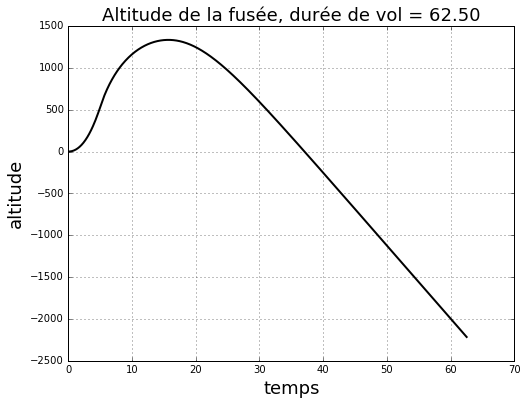

In [17]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'temps', fontsize=18)
pyplot.ylabel(r'altitude', fontsize=18)
pyplot.title('Altitude de la fusée, durée de vol = %.2f' % T, fontsize=18)
pyplot.plot(temps,altitude, 'k-', lw=2);

On vérifie bien que :

  1) L'abscisse du point d'inflexion correspondant au moment où la vitesse devient décroissante est bien t = 5
  
  2) L'ordonnée de ce point est bien légèrement au-dessus de h = 500
  
  3) Le maximum de cette fonction est bien aux alentours de h = 1350
  
  4) L'abscisse correspondante est bien aux alentours de t = 15
  
  5) Enfin, la fusée atteint bien h = 0 aux alentours de t = 37